# 1. Introduction
H-1B Visa has been a controversial topic in recent political debates. Here, without any political bias, we perform an extensive analysis on this Visa.

In [9]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from subprocess import check_output
from matplotlib.ticker import FuncFormatter
%matplotlib inline

# 2. Loading and Cleaning the Data

In [10]:
h1b_kaggle_df = pd.read_csv('../h1b_visa.csv', nrows=3000000)
print('Loading h1b_kaggle file... wait...')
df = h1b_kaggle_df[(h1b_kaggle_df['PREVAILING_WAGE']<600000) & (h1b_kaggle_df['CASE_STATUS']=='CERTIFIED')]
df = df.dropna(axis=0, how='all')

Loading h1b_kaggle file... wait...


# 3. Results and Discusions
## 3.1. Total H1-B Wage Distribution (Period 2011-2016)

Text(0.5, 1.0, 'H-1B Salary From 2011 to 2016')

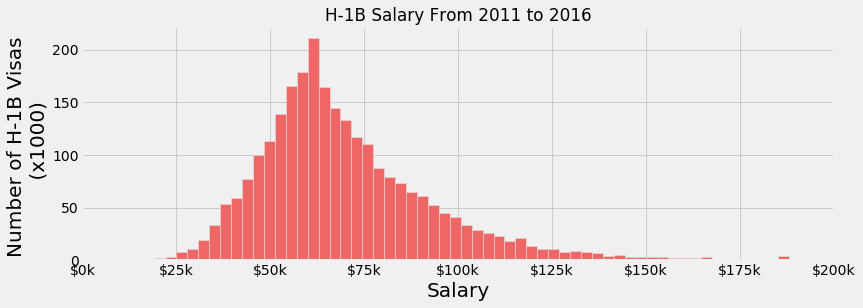

In [11]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.hist(df['PREVAILING_WAGE'],bins=200, edgecolor='#E6E6E6', color='#EE6666');
plt.xlim([0, 200000])

def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatterUSD = FuncFormatter(thousandUSD)
formatter = FuncFormatter(thousand)

plt.xlabel('Salary',size=20)
plt.ylabel('Number of H-1B Visas \n (x1000)', size=20)
ax.xaxis.set_major_formatter(formatterUSD)
ax.yaxis.set_major_formatter(formatter)
ax.set_title('H-1B Salary From 2011 to 2016')

## 3.2. H1-B Wage Distribution per Year 

KeyError: 0

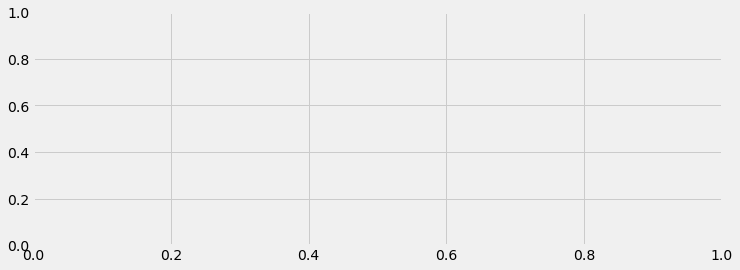

In [12]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(11, 4))
    df_temp = df[df['PREVAILING_WAGE']<150000]
    ax.violinplot(dataset = [df_temp[df_temp.YEAR == 2011]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2012]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2013]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2014]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2015]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2016]['PREVAILING_WAGE']])
def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)
formatterUSD = FuncFormatter(thousandUSD)

plt.xlabel('Year',size=20)
plt.ylabel('H-1B Salary', size=20)
ax.yaxis.set_major_formatter(formatterUSD)
ax.tick_params(direction='out', length=10, width=2, colors='k')
ax.set_xticklabels(range(2010,2017))
plt.title('H-1B Wage Distribution (2011 to 2016)')

# 3.3. Distribution of H-1B mployers

In [ ]:
employer_name = df['EMPLOYER_NAME'].value_counts().index.tolist()
employer_petitions = df['EMPLOYER_NAME'].value_counts().tolist()
employer_petitions
df_employer = df['EMPLOYER_NAME'].value_counts().to_frame().head(50)
df_employer = df_employer.reset_index()
df_employer.columns = ['EMPLOYER_NAME','H1B_COUNT']

In [ ]:
fig, ax = plt.subplots()# figsize=(8,4))
s = df_employer.set_index('EMPLOYER_NAME')['H1B_COUNT']
plt.style.use('fivethirtyeight')
ax = s.plot(kind='barh', figsize=(8, 25), 
            title='Top 50 H-1B Visa Sponsors')
ax.set_ylabel('', visible=False)
ax.tick_params(direction='out', length=10, width=2, colors='k')
ax.invert_yaxis()
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatter = FuncFormatter(thousand)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Number of Petitions (x1000)',size=20)

# 3.4. Wage Distribution in Top H-1B Visa Sponsors

In [ ]:
#df.info();
employer_name[0];

def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatterUSD = FuncFormatter(thousandUSD)
formatter = FuncFormatter(thousand)



with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(5, 1, figsize=(12, 20))
    for i in range(0,5):
        ax[i].hist(df[df['EMPLOYER_NAME']==employer_name[i]]['PREVAILING_WAGE'],
          bins=200, edgecolor='#E6E6E6', color='#EE6666');
        ax[i].set_title('%d-%s'%(i+1, employer_name[i]))
        ax[i].set_xlabel('Salary',size=20)
        ax[i].set_ylabel('Number of H-1B Visas \n (x1000)', size=20)
        ax[i].xaxis.set_major_formatter(formatterUSD)
        ax[i].yaxis.set_major_formatter(formatter)

plt.xlim([0, 200000])
fig.tight_layout()

# 3.5. Geographical Distribution of H-1B Employers

In [ ]:
def plotheatmap(df, tittle):
    from mpl_toolkits.basemap import Basemap
    from scipy.stats import gaussian_kde
    import math
    scale = 5
    fig, ax = plt.subplots(figsize=(12,6))

    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
    map.readshapefile('../input/basemap/st99_d00', name='states', drawbounds=True)

    x = np.asarray(df['lon'].tolist())
    y = np.asarray(df['lat'].tolist())
    where_are_NaNs = np.isnan(y)
    y[where_are_NaNs] = 0
    x[where_are_NaNs] = 0
    where_are_NaNs = np.isnan(x)
    y[where_are_NaNs] = 0
    x[where_are_NaNs] = 0

    where_are_NonZeros = np.nonzero(x)
    x = x[where_are_NonZeros]
    y = y[where_are_NonZeros]
    if len(x) > 10000: nsamples = 10000
    if len(x) < 10000: nsamples = len(x)
    simple_random_sampling = np.random.randint(0,len(x),nsamples)

    xs = x[simple_random_sampling]
    ys = y[simple_random_sampling]
    xy = np.vstack([xs,ys])
    xy = xy.astype('int')
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    xs, ys, z = xs[idx], ys[idx], z[idx]
    xmap,ymap = map(xs,ys)
    heatmap = ax.scatter(xmap,ymap,c=z,s=20,cmap='viridis')
    cb = plt.colorbar(heatmap)
    cb.set_label('Probability Density')
    plt.title(tittle)

plotheatmap(df, 'H-1B Visa Petitions')



# 3.6. Geographical Distribution of H-1B Top Employers

In [ ]:
employer_name[0];
for i in range(0,3):
 plotheatmap(df[df['EMPLOYER_NAME']==employer_name[i]],
          '%d-%s'%(i+1, employer_name[i]));
#plt.show()

In [ ]:
df_top20_worksite = df.groupby(['WORKSITE'], sort=False).size().nlargest(20).reset_index(name='top20')

# 3.7. Salary Distribution in Most Populated Cities

In [ ]:
df_temp = df_top20_worksite
for worksite in df_top20_worksite['WORKSITE']:
    if i==0: df_temp = df[df['WORKSITE']==worksite]
    if i>0: df_temp = pd.concat([df_temp,df[df['WORKSITE']==worksite]])
    i+=1

In [ ]:
import seaborn as sns
df_temp = df_temp[df_temp['PREVAILING_WAGE']<150000]
fig, ax = plt.subplots(figsize=(8,20))
ax = sns.violinplot(y='WORKSITE',x='PREVAILING_WAGE', data=df_temp,dodge=True,inner="quartile",bw=.2, linewidth=1.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)

formatterUSD = FuncFormatter(thousandUSD)
ax.xaxis.set_major_formatter(formatterUSD)
ax.set_title('Distribution of H-1B Salary in Top 20 H-1B Cities', fontsize=20)
ax.grid(True)
plt.xlabel('Salary',size=20)
plt.ylabel('City',size=20)